# Import Packages

In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

This looks at the GPA and Honors Courses of UCI and UCLA enrollees. All data looked at is taken from: https://www.universityofcalifornia.edu/about-us/information-center/freshman-admissions-summary

# UC Irvine

# GPA

In [356]:
# Data being presented here is separated via campus and by fall terms.
# Freshmen enrollees from all source schools

# start with the count/number, do percentage afterwards
UCI_GPA = pd.read_csv('Irvine_GPA_Count.csv')

# We only want to look at 2018 and later
UCI_GPA = UCI_GPA[UCI_GPA['Fall term'] >= 2018]
UCI_GPA = UCI_GPA.sort_values('Fall term')
UCI_GPA

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,"3,620","1,398",384,47.0,22.0,322
4,2019,"3,711","1,597",437,37.0,15.0,272
3,2020,"3,341","1,804",380,50.0,19.0,171
2,2021,"3,923","1,630",708,34.0,5.0,189
1,2022,"4,497",865,248,12.0,7.0,35
0,2023,"5,205","1,240",118,NaN,NaN,214


In [357]:
# Change all NaN to 0
UCI_GPA = UCI_GPA.fillna(0)
UCI_GPA

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,"3,620","1,398",384,47.0,22.0,322
4,2019,"3,711","1,597",437,37.0,15.0,272
3,2020,"3,341","1,804",380,50.0,19.0,171
2,2021,"3,923","1,630",708,34.0,5.0,189
1,2022,"4,497",865,248,12.0,7.0,35
0,2023,"5,205","1,240",118,0.0,0.0,214


In [358]:
# Shape of dataset
UCI_GPA.shape

(6, 7)

In [359]:
# Clean and convert columns to numeric
def clean_and_convert_column(column):
    column = column.astype(str).str.strip().str.replace(',', '', regex=False)
    return pd.to_numeric(column, errors='coerce')

# Apply cleaning to the object columns
for column in UCI_GPA.columns:
    if UCI_GPA[column].dtype == 'object':
        UCI_GPA[column] = clean_and_convert_column(UCI_GPA[column])
        

UCI_GPA

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,3620,1398,384,47.0,22.0,322
4,2019,3711,1597,437,37.0,15.0,272
3,2020,3341,1804,380,50.0,19.0,171
2,2021,3923,1630,708,34.0,5.0,189
1,2022,4497,865,248,12.0,7.0,35
0,2023,5205,1240,118,0.0,0.0,214


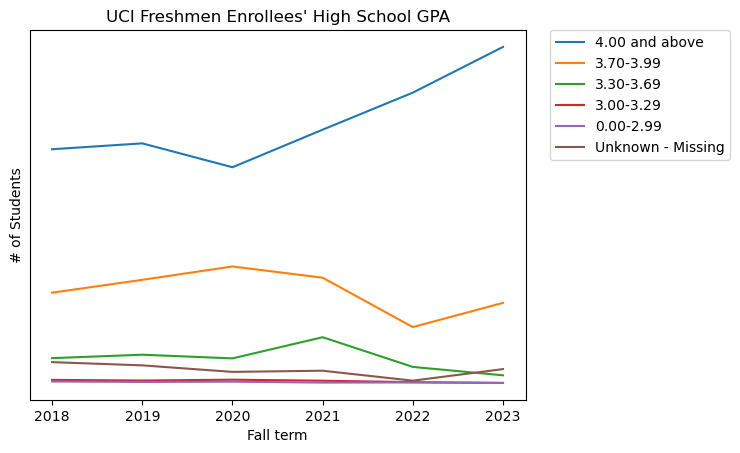

In [360]:
# Create line plots and label
sns.lineplot(data=UCI_GPA, x='Fall term', y='4.00 and above', label='4.00 and above')
sns.lineplot(data=UCI_GPA, x='Fall term', y='3.70-3.99', label='3.70-3.99')
sns.lineplot(data=UCI_GPA, x='Fall term', y='3.30-3.69', label='3.30-3.69')
sns.lineplot(data=UCI_GPA, x='Fall term', y='3.00-3.29', label='3.00-3.29')
sns.lineplot(data=UCI_GPA, x='Fall term', y='0.00-2.99', label='0.00-2.99')
sns.lineplot(data=UCI_GPA, x='Fall term', y='Unknown - Missing', label='Unknown - Missing')

# relabel the y-axis and create a title
plt.ylabel('# of Students')
plt.title("UCI Freshmen Enrollees' High School GPA")
plt.autoscale(enable=True, axis='y')

# make graph more readable
plt.yticks([])
plt.legend()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

In [361]:
# Let's look at percentages now
UCI_GPA_Percent = UCI_GPA.copy()

# Step 1: Calculate the total number of students for each year
UCI_GPA_Percent['Total'] = UCI_GPA_Percent.drop(columns=['Fall term']).sum(axis=1)

# Step 2: Convert each column (excluding 'Fall term' and 'Total') to percentages based on the total for that year
for column in UCI_GPA_Percent.columns[1:-1]:
    UCI_GPA_Percent[column] = (UCI_GPA_Percent[column] / UCI_GPA_Percent['Total']) * 100

# Step 3: Drop the 'Total' column after converting to percentages
UCI_GPA_Percent.drop(columns=['Total'], inplace=True)
UCI_GPA_Percent

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,62.489211,24.132574,6.628690,0.811324,0.379769,5.558433
4,2019,61.146812,26.314055,7.200527,0.609656,0.247158,4.481793
3,2020,57.953166,31.292281,6.591500,0.867303,0.329575,2.966175
2,2021,60.456157,25.119433,10.910772,0.523964,0.077053,2.912621
1,2022,79.396186,15.271893,4.378531,0.211864,0.123588,0.617938
0,2023,76.803896,18.297182,1.741183,0.000000,0.000000,3.157739


In [362]:
# Shape of dataset
UCI_GPA_Percent.shape

(6, 7)

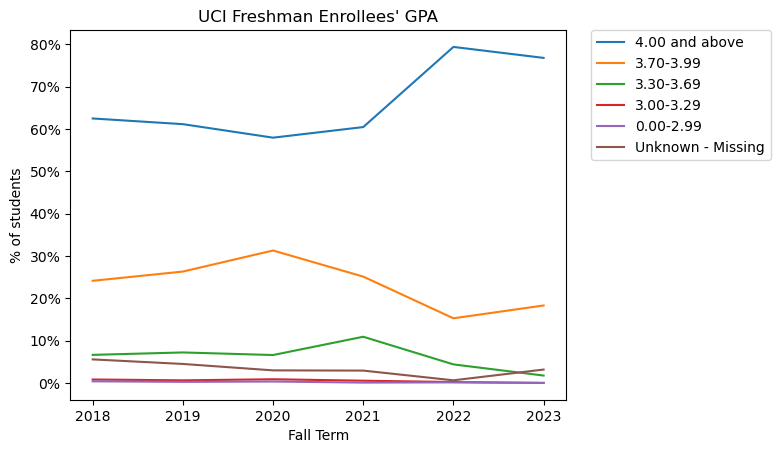

In [363]:
# Create line plots and label
sns.lineplot(data=UCI_GPA_Percent, x='Fall term', y='4.00 and above', label='4.00 and above')
sns.lineplot(data=UCI_GPA_Percent, x='Fall term', y='3.70-3.99', label='3.70-3.99')
sns.lineplot(data=UCI_GPA_Percent, x='Fall term', y='3.30-3.69', label='3.30-3.69')
sns.lineplot(data=UCI_GPA_Percent, x='Fall term', y='3.00-3.29', label='3.00-3.29')
sns.lineplot(data=UCI_GPA_Percent, x='Fall term', y='0.00-2.99', label='0.00-2.99')
sns.lineplot(data=UCI_GPA_Percent, x='Fall term', y='Unknown - Missing', label='Unknown - Missing')

# Relabel the graph
plt.xlabel('Fall Term')
plt.ylabel('% of students')
plt.title("UCI Freshman Enrollees' GPA")
# Make the y-axis into percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend and move it outside of the graph for visibility
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Honors Courses

In [364]:
UCI_HC = pd.read_csv('Irvine_HC_Count.csv')

# Same as last time, only want 2018 and onwards
UCI_HC = UCI_HC[UCI_HC['Fall term'] >= 2018]
UCI_HC = UCI_HC.sort_values('Fall term')
UCI_HC

,Fall term,10.0 or more courses,5.0- 9.9 courses,Less than 5.0 courses/unknown
5,2018,"1,539","2,724","1,530"
4,2019,"1,638","3,119","1,312"
3,2020,"1,676","2,874","1,215"
2,2021,"2,280","2,955","1,254"
1,2022,"2,187","2,544",933
0,2023,"2,558","2,962","1,276"


In [365]:
# Shape of dataset
UCI_HC.shape

(6, 4)

In [366]:
# Apply cleaning to the object columns
for column in UCI_HC.columns:
    if UCI_HC[column].dtype == 'object':
        UCI_HC[column] = clean_and_convert_column(UCI_HC[column])

UCI_HC

,Fall term,10.0 or more courses,5.0- 9.9 courses,Less than 5.0 courses/unknown
5,2018,1539,2724,1530
4,2019,1638,3119,1312
3,2020,1676,2874,1215
2,2021,2280,2955,1254
1,2022,2187,2544,933
0,2023,2558,2962,1276


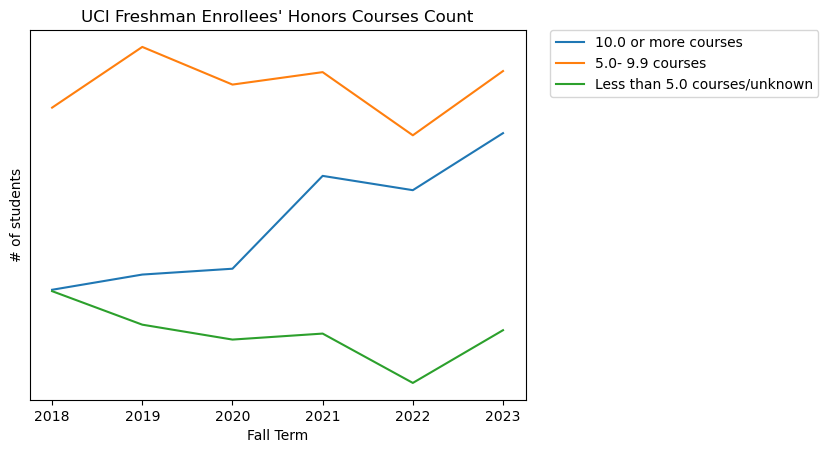

In [367]:
# Create the line plots and label
sns.lineplot(data=UCI_HC, x='Fall term', y='10.0 or more courses', label='10.0 or more courses')
sns.lineplot(data=UCI_HC, x='Fall term', y='5.0- 9.9 courses', label='5.0- 9.9 courses')
sns.lineplot(data=UCI_HC, x='Fall term', y='Less than 5.0 courses/unknown', label='Less than 5.0 courses/unknown')


# Relabel the graph
plt.xlabel('Fall Term')
plt.ylabel('# of students')
plt.title("UCI Freshman Enrollees' Honors Courses Count")

# Remove y-axis tick labels
plt.yticks([])

# Add a legend and move it outside of the graph for visibility
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [368]:
# Look at the percentages
UCI_HC_Percent = UCI_HC.copy()

# Step 1: Calculate the total number of students for each year
UCI_HC_Percent['Total'] = UCI_HC_Percent.drop(columns=['Fall term']).sum(axis=1)

# Step 2: Convert each column (excluding 'Fall term' and 'Total') to percentages based on the total for that year
for column in UCI_HC_Percent.columns[1:-1]:
    UCI_HC_Percent[column] = (UCI_HC_Percent[column] / UCI_HC_Percent['Total']) * 100

# Step 3: Drop the 'Total' column after converting to percentages
UCI_HC_Percent.drop(columns=['Total'], inplace=True)

UCI_HC_Percent


,Fall term,10.0 or more courses,5.0- 9.9 courses,Less than 5.0 courses/unknown
5,2018,26.566546,47.022268,26.411186
4,2019,26.989619,51.392322,21.618059
3,2020,29.071986,49.852559,21.075455
2,2021,35.136385,45.538604,19.325012
1,2022,38.612288,44.915254,16.472458
0,2023,37.639788,43.584461,18.775750


In [369]:
# Shape of dataset
UCI_HC_Percent.shape

(6, 4)

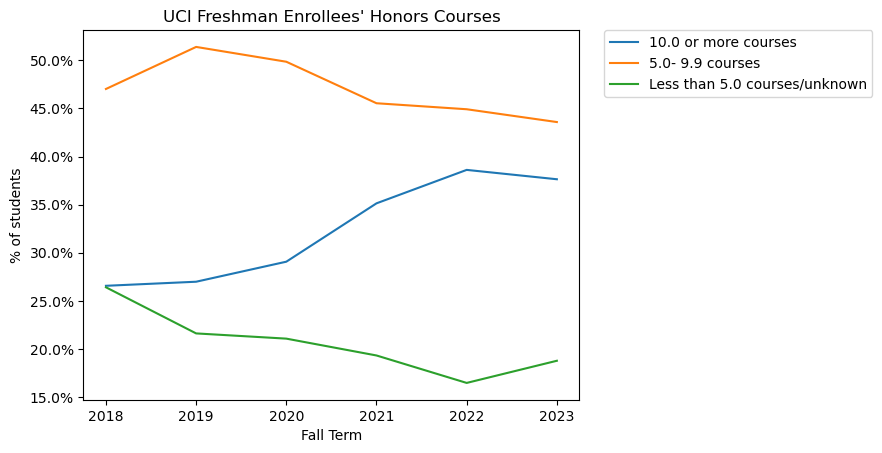

In [370]:
# Create the line plots and label
sns.lineplot(data=UCI_HC_Percent, x='Fall term', y='10.0 or more courses', label='10.0 or more courses')
sns.lineplot(data=UCI_HC_Percent, x='Fall term', y='5.0- 9.9 courses', label='5.0- 9.9 courses')
sns.lineplot(data=UCI_HC_Percent, x='Fall term', y='Less than 5.0 courses/unknown', label='Less than 5.0 courses/unknown')

# Relabel the graph
plt.xlabel('Fall Term')
plt.ylabel('% of students')
plt.title("UCI Freshman Enrollees' Honors Courses")
# Make the y-axis into percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend and move it outside of the graph for visibility
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# UC Los Angeles

# GPA

In [371]:
# start with the count/number, do percentage afterwards
UCLA_GPA = pd.read_csv('LosAngeles_GPA_Count.csv')

# We only want to look at 2018 and later
UCLA_GPA = UCLA_GPA[UCLA_GPA['Fall term'] >= 2018]
UCLA_GPA = UCLA_GPA.sort_values('Fall term')
UCLA_GPA

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,"5,096",522,197,40,19,366
4,2019,"5,080",357,156,27,11,289
3,2020,"5,627",385,133,37,20,184
2,2021,"5,821",351,128,26,7,251
1,2022,"5,810",317,85,13,12,225
0,2023,"5,971",284,99,17,23,191


In [372]:
# shape of dataset
UCLA_GPA.shape

(6, 7)

In [373]:
# Apply cleaning to the object columns
for column in UCLA_GPA.columns:
    if UCLA_GPA[column].dtype == 'object':
        UCLA_GPA[column] = clean_and_convert_column(UCLA_GPA[column])

UCLA_GPA

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,5096,522,197,40,19,366
4,2019,5080,357,156,27,11,289
3,2020,5627,385,133,37,20,184
2,2021,5821,351,128,26,7,251
1,2022,5810,317,85,13,12,225
0,2023,5971,284,99,17,23,191


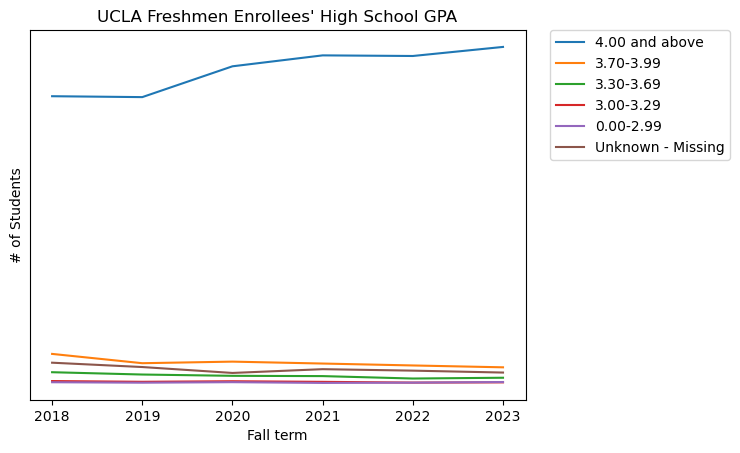

In [374]:
# Create line plots and label
sns.lineplot(data=UCLA_GPA, x='Fall term', y='4.00 and above', label='4.00 and above')
sns.lineplot(data=UCLA_GPA, x='Fall term', y='3.70-3.99', label='3.70-3.99')
sns.lineplot(data=UCLA_GPA, x='Fall term', y='3.30-3.69', label='3.30-3.69')
sns.lineplot(data=UCLA_GPA, x='Fall term', y='3.00-3.29', label='3.00-3.29')
sns.lineplot(data=UCLA_GPA, x='Fall term', y='0.00-2.99', label='0.00-2.99')
sns.lineplot(data=UCLA_GPA, x='Fall term', y='Unknown - Missing', label='Unknown - Missing')

# relabel the y-axis and create a title
plt.ylabel('# of Students')
plt.title("UCLA Freshmen Enrollees' High School GPA")

# make graph more readable
plt.yticks([])
plt.legend()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

In [375]:
# Let's look at percentages now
UCLA_GPA_Percent = UCLA_GPA.copy()

# Step 1: Calculate the total number of students for each year
UCLA_GPA_Percent['Total'] = UCLA_GPA_Percent.drop(columns=['Fall term']).sum(axis=1)

# Step 2: Convert each column (excluding 'Fall term' and 'Total') to percentages based on the total for that year
for column in UCLA_GPA_Percent.columns[1:-1]:
    UCLA_GPA_Percent[column] = (UCLA_GPA_Percent[column] / UCLA_GPA_Percent['Total']) * 100

# Step 3: Drop the 'Total' column after converting to percentages
UCLA_GPA_Percent.drop(columns=['Total'], inplace=True)
UCLA_GPA_Percent

,Fall term,4.00 and above,3.70-3.99,3.30-3.69,3.00-3.29,0.00-2.99,Unknown - Missing
5,2018,81.666667,8.365385,3.157051,0.641026,0.304487,5.865385
4,2019,85.810811,6.030405,2.635135,0.456081,0.185811,4.881757
3,2020,88.114626,6.028813,2.082681,0.579392,0.313185,2.881303
2,2021,88.411300,5.331106,1.944107,0.394897,0.106318,3.812272
1,2022,89.910245,4.905602,1.315382,0.201176,0.185701,3.481894
0,2023,90.675778,4.312832,1.503417,0.258162,0.349279,2.900532


In [376]:
# shape of dataset
UCLA_GPA_Percent.shape

(6, 7)

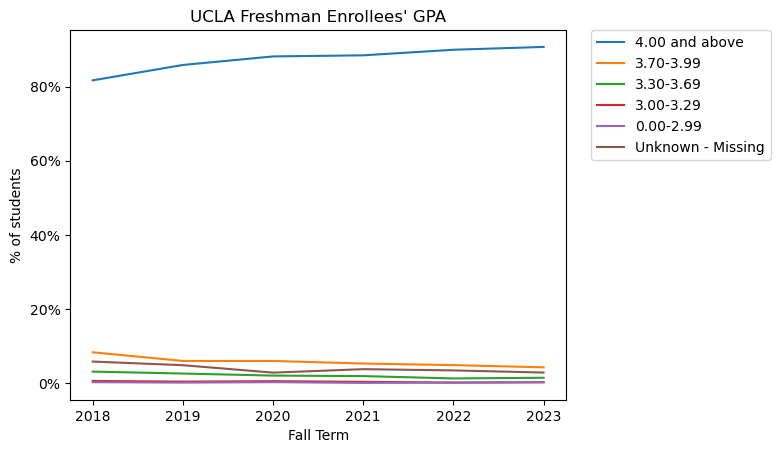

In [377]:
# Create the line plots and label
sns.lineplot(data=UCLA_GPA_Percent, x='Fall term', y='4.00 and above', label='4.00 and above')
sns.lineplot(data=UCLA_GPA_Percent, x='Fall term', y='3.70-3.99', label='3.70-3.99')
sns.lineplot(data=UCLA_GPA_Percent, x='Fall term', y='3.30-3.69', label='3.30-3.69')
sns.lineplot(data=UCLA_GPA_Percent, x='Fall term', y='3.00-3.29', label='3.00-3.29')
sns.lineplot(data=UCLA_GPA_Percent, x='Fall term', y='0.00-2.99', label='0.00-2.99')
sns.lineplot(data=UCLA_GPA_Percent, x='Fall term', y='Unknown - Missing', label='Unknown - Missing')

# Relabel the graph
plt.xlabel('Fall Term')
plt.ylabel('% of students')
plt.title("UCLA Freshman Enrollees' GPA")
# Make the y-axis into percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend and move it outside of the graph for visibility
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Honors Courses

In [378]:
UCLA_HC = pd.read_csv('LosAngeles_HC_Count.csv')

# Same as last time, only want 2018 and onwards
UCLA_HC = UCLA_HC[UCLA_HC['Fall term'] >= 2018]
UCLA_HC = UCLA_HC.sort_values('Fall term')
UCLA_HC

,Fall term,10.0 or more courses,5.0- 9.9 courses,Less than 5.0 courses/unknown
5,2018,"3,757","1,858",625
4,2019,"3,762","1,635",523
3,2020,"4,136","1,792",458
2,2021,"4,551","1,472",561
1,2022,"4,463","1,518",481
0,2023,"4,570","1,559",456


In [379]:
# shape of dataset
UCLA_HC.shape

(6, 4)

In [380]:
# Apply cleaning to the object columns
for column in UCLA_HC.columns:
    if UCLA_HC[column].dtype == 'object':
        UCLA_HC[column] = clean_and_convert_column(UCLA_HC[column])

UCLA_HC

,Fall term,10.0 or more courses,5.0- 9.9 courses,Less than 5.0 courses/unknown
5,2018,3757,1858,625
4,2019,3762,1635,523
3,2020,4136,1792,458
2,2021,4551,1472,561
1,2022,4463,1518,481
0,2023,4570,1559,456


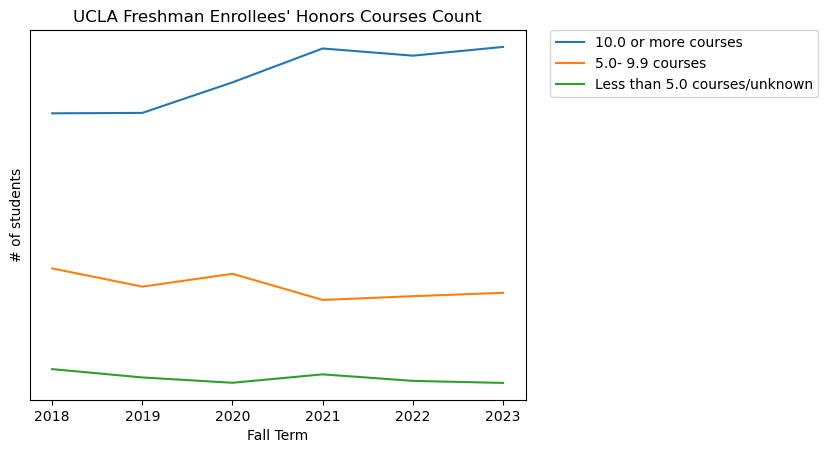

In [381]:
# Create the lineplots and label
sns.lineplot(data=UCLA_HC, x='Fall term', y='10.0 or more courses', label='10.0 or more courses')
sns.lineplot(data=UCLA_HC, x='Fall term', y='5.0- 9.9 courses', label='5.0- 9.9 courses')
sns.lineplot(data=UCLA_HC, x='Fall term', y='Less than 5.0 courses/unknown', label='Less than 5.0 courses/unknown')


# Relabel the graph
plt.xlabel('Fall Term')
plt.ylabel('# of students')
plt.title("UCLA Freshman Enrollees' Honors Courses Count")

# Remove y-axis tick labels
plt.yticks([])

# Add a legend and move it outside of the graph for visibility
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [382]:
# Look at the percentages
UCLA_HC_Percent = UCLA_HC.copy()

# Step 1: Calculate the total number of students for each year
UCLA_HC_Percent['Total'] = UCLA_HC_Percent.drop(columns=['Fall term']).sum(axis=1)

# Step 2: Convert each column (excluding 'Fall term' and 'Total') to percentages based on the total for that year
for column in UCLA_HC_Percent.columns[1:-1]:
    UCLA_HC_Percent[column] = (UCLA_HC_Percent[column] / UCLA_HC_Percent['Total']) * 100

# Step 3: Drop the 'Total' column after converting to percentages
UCLA_HC_Percent.drop(columns=['Total'], inplace=True)

UCLA_HC_Percent


,Fall term,10.0 or more courses,5.0- 9.9 courses,Less than 5.0 courses/unknown
5,2018,60.208333,29.775641,10.016026
4,2019,63.547297,27.618243,8.834459
3,2020,64.766677,28.061384,7.171939
2,2021,69.122114,22.357230,8.520656
1,2022,69.065305,23.491179,7.443516
0,2023,69.400152,23.675019,6.924829


In [383]:
# shape of dataset
UCLA_HC_Percent.shape

(6, 4)

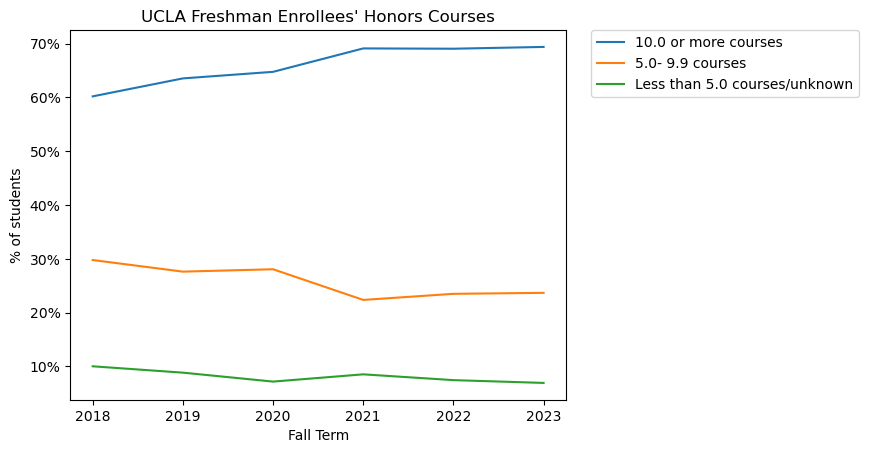

In [384]:
# Create the line plots and label
sns.lineplot(data=UCLA_HC_Percent, x='Fall term', y='10.0 or more courses', label='10.0 or more courses')
sns.lineplot(data=UCLA_HC_Percent, x='Fall term', y='5.0- 9.9 courses', label='5.0- 9.9 courses')
sns.lineplot(data=UCLA_HC_Percent, x='Fall term', y='Less than 5.0 courses/unknown', label='Less than 5.0 courses/unknown')

# Relabel the graph
plt.xlabel('Fall Term')
plt.ylabel('% of students')
plt.title("UCLA Freshman Enrollees' Honors Courses")
# Make the y-axis into percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend and move it outside of the graph for visibility
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()